In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [7]:
tickers = ["SPY", "AGG"]
end_date = datetime.now()
start_date = end_date + timedelta(-1825)
df = get_historical_data(tickers, start_date, end_date, output_format='pandas')
df.head()

SPY                                       AGG                  \
              open    high     low   close    volume    open    high     low   
date                                                                           
2014-08-27  200.43  200.57  199.94  200.25  47873708  109.73  109.85  109.70   
2014-08-28  199.59  200.27  199.39  200.14  58330373  109.96  110.05  109.89   
2014-08-29  200.45  200.73  199.82  200.71  65906598  110.00  110.09  109.94   
2014-09-02  200.97  201.00  199.86  200.61  72425793  109.55  109.63  109.45   
2014-09-03  201.38  201.41  200.22  200.50  57461742  109.39  109.58  109.37   

                             
             close   volume  
date                         
2014-08-27  109.80   866103  
2014-08-28  110.02  1123701  
2014-08-29  109.98  1473300  
2014-09-02  109.45  1029287  
2014-09-03  109.57  1311668

In [8]:
# Drop extraneous columns
df.drop(columns = ['open', 'high', 'low', 'volume'], level = 1, inplace = True)
df.head()

,SPY,AGG
,close,close
date,,
2014-08-27,200.25,109.80
2014-08-28,200.14,110.02
2014-08-29,200.71,109.98
2014-09-02,200.61,109.45
2014-09-03,200.50,109.57


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [9]:
# Calculate the daily returns for SPY and AGG
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2014-08-27,NaN,NaN
2014-08-28,-0.000549,0.002004
2014-08-29,0.002848,-0.000364
2014-09-02,-0.000498,-0.004819
2014-09-03,-0.000548,0.001096


In [12]:
# Calculate the value of Average Daily Returns
avg_daily_returns_spy = daily_returns.mean()['SPY']['close']
avg_daily_returns_agg = daily_returns.mean()['AGG']['close']
print(f"Average daily returns of SPY: {avg_daily_returns_spy}")
print(f"Average daily returns of AGG: {avg_daily_returns_agg}")

Average daily returns of SPY: 0.0003179221939699189
Average daily returns of AGG: 3.0368344567238868e-05


In [17]:
# Calculate volatility
std_daily_returns_spy = daily_returns.std()['SPY']['close']
std_daily_returns_agg = daily_returns.std()['AGG']['close']
print(f"SPY standard deviation of daily returns: {std_daily_returns_spy}")
print(f"AGG standard deviation of daily returns: {std_daily_returns_agg}")

SPY standard deviation of daily returns: 0.008632008730538526
AGG standard deviation of daily returns: 0.002009934552025007


In [20]:
# Save the last day's closing price
spy_last_price = df['SPY']['close'][-1]
agg_last_price = df['AGG']['close'][-1]

In [83]:
# Setup the Monte Carlo Parameters
number_simulations = 500
number_of_trading_days = 252 * 30
monte_carlo_simulated_prices = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()
simulation = 0

In [84]:
# Run the Monte Carlo Simulation
for x in range(number_simulations):
    simulated_spy_prices = [spy_last_price]
    simulated_agg_prices = [agg_last_price]
    simulation += 1
    for i in range(number_of_trading_days):
        simulated_spy_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_returns_spy, std_daily_returns_spy))
        simulated_agg_price = simulated_agg_prices[-1] * (1 + np.random.normal(avg_daily_returns_agg, std_daily_returns_agg))
        
        simulated_spy_prices.append(simulated_spy_price)
        simulated_agg_prices.append(simulated_agg_price)
    
    monte_carlo_simulated_prices['SPY prices'] = pd.Series(simulated_spy_prices)
    monte_carlo_simulated_prices['AGG prices'] = pd.Series(simulated_agg_prices)
    
    simulated_daily_returns = monte_carlo_simulated_prices.pct_change()
    
    weights = [0.60,0.40]
    
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    portfolio_cumulative_returns[simulation] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
 
portfolio_cumulative_returns.head()

    
    

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999919,0.991422,1.000232,1.007521,0.999774,1.001572,0.995337,0.995107,0.992924,0.995281,...,1.005035,0.999692,1.008041,1.001288,1.004390,0.993724,1.004011,0.998768,1.002377,0.999662
2,0.997128,1.001909,0.992193,1.005455,0.999605,1.005873,1.002524,0.994378,0.993050,1.002218,...,0.999396,0.996159,1.007009,0.995395,1.012400,0.993503,1.008359,1.004952,0.997668,0.997702
3,1.000192,1.007349,0.994590,1.000948,1.003834,1.014976,1.002773,0.990571,0.990996,1.007869,...,0.997784,0.997178,1.005349,0.996140,1.010609,0.989186,1.010795,1.005582,1.000140,0.990935
4,1.006656,1.015870,0.991995,0.994328,1.005392,1.011235,1.002797,0.987609,0.992492,1.010019,...,0.998000,0.999242,1.010404,0.991849,1.008614,0.986115,1.015709,1.006455,1.002320,0.993394


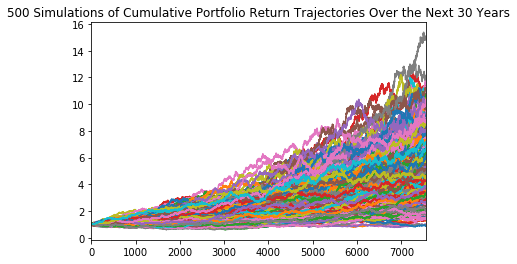

In [85]:
# Visualize the Simulation
plot_title = f"{simulation} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend = None, title = plot_title)


In [86]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
ending_cumulative_returns_30_years = portfolio_cumulative_returns.iloc[-1,:]
ending_cumulative_returns_30_years.head()

1    3.254571
2    6.686574
3    3.881902
4    3.573229
5    2.845605
Name: 7560, dtype: float64

In [87]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_cumulative_returns_20_years = portfolio_cumulative_returns.iloc[-3651,:]
ending_cumulative_returns_20_years.head()

1    2.785600
2    2.633819
3    2.590310
4    2.914704
5    2.441658
Name: 3910, dtype: float64

In [88]:
# Display the 90% confidence interval for the ending returns at 20 years
confidence_interval_20_years = ending_cumulative_returns_20_years.quantile(q = [0.05, 0.95])
print(confidence_interval_20_years)

0.05    1.219557
0.95    3.572694
Name: 3910, dtype: float64


In [89]:
# Display the 90% confidence interval for the ending returns at 30 years
confidence_interval_30_years = ending_cumulative_returns_30_years.quantile(q = [0.05, 0.95])
print(confidence_interval_30_years)

0.05    1.874061
0.95    8.854868
Name: 7560, dtype: float64


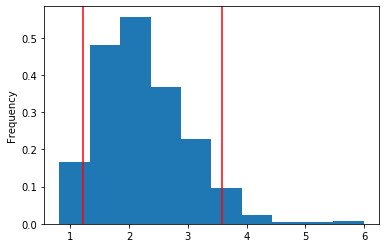

In [90]:
# Visualize the distribution of the ending returns at 20 years
plt.figure();
ending_cumulative_returns_20_years.plot(kind = 'hist', density = True, bins = 10)
plt.axvline(confidence_interval_20_years.iloc[0], color = 'r')
plt.axvline(confidence_interval_20_years.iloc[1], color = 'r')

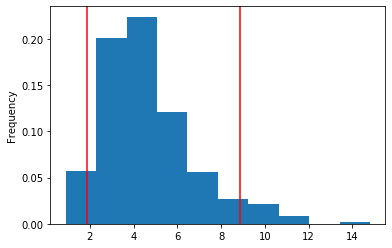

In [91]:
# Visualize the distribution of the ending returns at 30 years
plt.figure();
ending_cumulative_returns_30_years.plot(kind = 'hist', density = True, bins = 10)
plt.axvline(confidence_interval_30_years.iloc[0], color = 'r')
plt.axvline(confidence_interval_30_years.iloc[1], color = 'r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [92]:
confidence_interval_30_years_10_50_90 = ending_cumulative_returns_30_years.quantile(q = [0.10, 0.50, 0.90])
print(f"Expected Cumulative Returns at 10th percentile: {confidence_interval_30_years_10_50_90.iloc[0]}")
print(f"Expected Cumulative Returns at 50th percentile: {confidence_interval_30_years_10_50_90.iloc[1]}")
print(f"Expected Cumulative Returns at 90th percentile: {confidence_interval_30_years_10_50_90.iloc[2]}")


Expected Cumulative Returns at 10th percentile: 2.415283643056255
Expected Cumulative Returns at 50th percentile: 4.183175575764423
Expected Cumulative Returns at 90th percentile: 7.434980120828726


### Given an initial investment of `$50,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [114]:
expected_cumulative_return_10th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[0]), 2)
print(f"Expected Portfolio Return of $50,000 at the 10th percentile: ${expected_cumulative_return_10th_percentile}")
expected_cumulative_return_50th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[1]), 2)
print(f"Expected Portfolio Return of $50,000 at the 50th percentile: ${expected_cumulative_return_50th_percentile}")
expected_cumulative_return_90th_percentile = round(50000 * (confidence_interval_30_years_10_50_90.iloc[2]), 2)
print(f"Expected Portfolio Return of $50,000 at the 90th percentile: ${expected_cumulative_return_90th_percentile}")



Expected Portfolio Return of $50,000 at the 10th percentile: $120764.18
Expected Portfolio Return of $50,000 at the 50th percentile: $209158.78
Expected Portfolio Return of $50,000 at the 90th percentile: $371749.01


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [98]:
withdrawal_rate = 0.04
income_at_10th_percentile = round(expected_cumulative_return_10th_percentile * withdrawal_rate, 2)
print(f" Income assuming a 4% withdrawal rate at 10th percentile: ${income_at_10th_percentile}")

 Income assuming a 4% withdrawal rate at 10th percentile: $4830.57


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [101]:
expected_portfolio_return_75k_10th_percentile = round(75000 * (confidence_interval_30_years_10_50_90.iloc[0]), 2)
income_at_10th_percentile_75k = expected_portfolio_return_75k_10th_percentile * withdrawal_rate
print(f"Income assuming 4% withdrawal rate with $75k initial investment: ${income_at_10th_percentile_75k}")



Income assuming 4% withdrawal rate with $75k initial investment: $7245.8508


### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

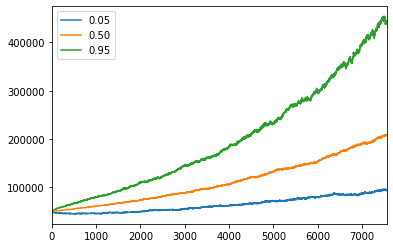

In [165]:

quantiled_day = 0
list_of_quantiled_days_5th = []
list_of_quantiled_days_50th = []
list_of_quantiled_days_95th = []
for index, row in portfolio_cumulative_returns.iterrows():
    quantiled_day_5th = row.quantile(q = 0.05) * 50000
    quantiled_day_50th = row.quantile(q = 0.50) * 50000
    quantiled_day_95th = row.quantile(q = 0.95) * 50000
    list_of_quantiled_days_5th.append(quantiled_day_5th)
    list_of_quantiled_days_50th.append(quantiled_day_50th)
    list_of_quantiled_days_95th.append(quantiled_day_95th)
cumulative_returns_5th_percentile = pd.Series(list_of_quantiled_days_5th)
cumulative_returns_50th_percentile = pd.Series(list_of_quantiled_days_50th)
cumulative_returns_95th_percentile = pd.Series(list_of_quantiled_days_95th)
cumulative_returns_5th_50th_95th_percentile_df = pd.concat([cumulative_returns_5th_percentile,cumulative_returns_50th_percentile,cumulative_returns_95th_percentile], axis = 1)
cumulative_returns_5th_50th_95th_percentile_df.rename(columns = {0:'0.05', 1:'0.50', 2:'0.95'}, inplace = True)
cumulative_returns_5th_50th_95th_percentile_df.plot()
